# Проект e-commerce

In [1]:
import pandas as pd
from io import BytesIO
import requests
from urllib.parse import urlencode
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from datetime import timedelta

C:\Users\Irina\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

In [3]:
public_key = 'https://disk.yandex.by/d/Qq6GtKktSYtK3w'  # Сюда вписываю мою ссылку

# Получаю загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [4]:
# Загружаю файл и сохраняю его
r = requests.get(download_url)
data_1 = r.content
customers = pd.read_csv(BytesIO(data_1))
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
public_key_2 = 'https://disk.yandex.by/d/vXxmMG8vDbXrRA'  # Сюда вписываю мою ссылку

# Получаю загрузочную ссылку
final_url_2 = base_url + urlencode(dict(public_key=public_key_2))
response2 = requests.get(final_url_2)
download_url_2 = response2.json()['href']

# Загружаю файл и сохраняю его
r2 = requests.get(download_url_2)
data_2 = r2.content
orders = pd.read_csv(BytesIO(data_2))
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
#конвертирую данные в дату, где необходимо 
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)

In [7]:
public_key_3 = 'https://disk.yandex.by/d/1iJzheGxQpKpAA'  # Сюда вписываю мою ссылку

# Получаю загрузочную ссылку
final_url_3 = base_url + urlencode(dict(public_key=public_key_3))
response3 = requests.get(final_url_3)
download_url_3 = response3.json()['href']

# Загружаю файл и сохраняю его
r3 = requests.get(download_url_3)
data_3 = r3.content
items = pd.read_csv(BytesIO(data_3))
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
#конвертирую данные в дату, где необходимо 
items['shipping_limit_date'] = pd.to_datetime(items.shipping_limit_date)

# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Перед тем, как посчитать количество пользователей, которые совершили покупку только один раз, необходимо определить условие, по какому будем учитывать факт покупки (cведения о заказах хранятся в таблице **orders**).
<br>Для этого рассчитаем количество заказов со статусом **delivered**, количество доставленных заказов **order_delivered_customer_date** в разрезе статусов заказов, проверим наличие пустых значений.

In [9]:
orders.order_delivered_customer_date.notna().sum()

96476

In [10]:
orders.query('order_delivered_customer_date.notna()').groupby('order_status', as_index=False).agg({'order_id' : 'count'})

,order_status,order_id
0,canceled,6
1,delivered,96470


In [11]:
orders.groupby('order_status', as_index=False).agg({'order_id' : 'count'})

,order_status,order_id
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [12]:
orders[orders.order_status == 'delivered'].order_delivered_customer_date.isna().sum()

8

In [13]:
orders[orders.order_status == 'delivered'].order_delivered_customer_date.notna().sum()

96470

Исходя из полученных данных факт покупки принимаем при статусе заказа **delivered** и не пустым значением по колонке  **order_delivered_customer_date**.

Теперь можем посчитать количество пользователей, которые совершили покупку только один раз.
<br>Но перед этим необходимо объединить таблицу **orders** со сведениями о заказах и таблицу **customers** со сведениями о пользователях, где мы можем видеть уникальный идентификатор пользователя.
<br>Тип объединения *LEFT JOIN*, присоединяем *customers* к *orders*, чтобы не потерять данные по заказам.

In [14]:
orders_customers = orders.merge(customers, how='left', on = 'customer_id')

Проверим, есть ли значения *customer_id*, для которых не нашлось совпадения у *customer_unique_id*.

In [15]:
orders_customers.query("customer_id.notna() and customer_unique_id.isna()")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


**Вывод**: все искомые значение имеют совпадения.

Теперь можем рассчитать количество пользователей по *customer_unique_id*, которые совершили покупку только один раз.

In [16]:
count_customers = orders_customers.query("order_status == 'delivered' and order_delivered_customer_date.notna()")\
    .groupby('customer_unique_id', as_index=False).agg({'order_id' : 'count'})\
    .rename(columns={'order_id' : 'count_orders'}).sort_values('count_orders', ascending=False)

In [17]:
summa = count_customers[count_customers.count_orders == 1].count_orders.sum()
summa

90549

In [18]:
print('Ответ: {} пользователей, которые совершили покупку только один раз'.format(summa))

Ответ: 90549 пользователей, которые совершили покупку только один раз


# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Продолжим работать в объединенной таблице **orders_customers**. 
<br>Создадим колонки с месяцем и годом из колонки с обещанной датой доставки **order_estimated_delivery_date**. Выбираем для дальнейшего анализа именно ее, потому что мы предполагаем, что именно в эту дату товары должны быть доставлены. А по условию задачи нам наоборот нужно найти те заказы, которые не были доставлены.

In [19]:
# orders_customers['plan_month_per_year'] = orders_customers.order_estimated_delivery_date.dt.strftime('%Y-%m')
orders_customers['plan_month'] = orders_customers.order_estimated_delivery_date.dt.month
orders_customers['plan_year'] = orders_customers.order_estimated_delivery_date.dt.year

Создадим новый датафрейм с количеством заказов в разрезе статусов и месяцев планируемой даты поставки.

In [20]:
rejected_orders = orders_customers.query("order_status != 'delivered'")\
    .groupby(['plan_year', 'plan_month', 'order_status'], as_index=False)\
    .agg({'order_id' : 'count', 'customer_unique_id' : 'nunique'})\
    .sort_values(['plan_year', 'plan_month'], ascending=True)\
    .rename(columns={'order_id' : 'count_orders', 'customer_unique_id' : 'count_customer_unique'})
rejected_orders.head()

,plan_year,plan_month,order_status,count_orders,count_customer_unique
0,2016,9,canceled,1,1
1,2016,10,canceled,3,3
2,2016,10,shipped,1,1
3,2016,11,canceled,14,14
4,2016,11,invoiced,9,9


Создадим новый столбец со средними значениями количества заказов в месяц (общее число заказов разделить на число уникальных юзеров).

In [21]:
rejected_orders['mean_orders'] = rejected_orders.count_orders / rejected_orders.count_customer_unique

In [22]:
rejected_orders.head()

,plan_year,plan_month,order_status,count_orders,count_customer_unique,mean_orders
0,2016,9,canceled,1,1,1.0
1,2016,10,canceled,3,3,1.0
2,2016,10,shipped,1,1,1.0
3,2016,11,canceled,14,14,1.0
4,2016,11,invoiced,9,9,1.0


Искомые данные по количеству заказов в месяц в среднем, которые не доставляется по разным причинам, мы получили - датафрейм **rejected_orders**.

Дополнительно можно визуализировать динамику среднего количества недоставленных заказов в разрезе причин.

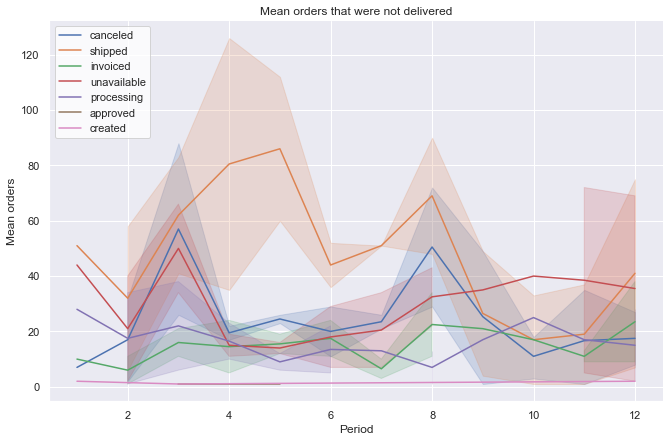

In [23]:
sns.set(rc={"figure.figsize":(11, 7)})
mean_orders = sns.lineplot(x='plan_month', y='count_orders', hue='order_status', data=rejected_orders)
sns.set_style("whitegrid")
mean_orders.set_xlabel('Period')
mean_orders.set_ylabel('Mean orders')
mean_orders.set_title('Mean orders that were not delivered')
plt.legend(loc='upper left')
sns.despine()

Из графика мы можем заметить, что наибольшее количество отмененных заказов дошло до статуса **shipped**, т.е. заказ был отгружен со склада.

Если посмотреть на динамику числа неотгруженных заказов только по месяцам в разрезе лет, то можно заметить, динамика разная, при этом в оба года есть проблемы с покупками в марте.

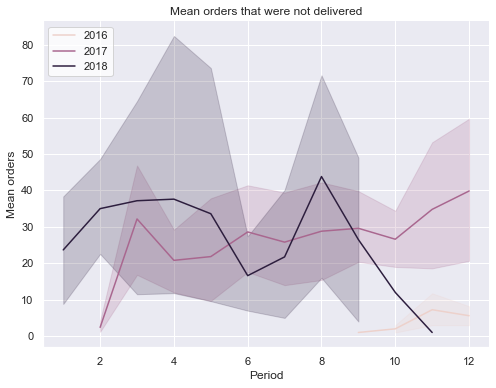

In [24]:
sns.set(rc={"figure.figsize":(8, 6)})
mean_orders_2 = sns.lineplot(x='plan_month', y='count_orders', hue='plan_year', data=rejected_orders)
sns.set_style("whitegrid")
mean_orders_2.set_xlabel('Period')
mean_orders_2.set_ylabel('Mean orders')
mean_orders_2.set_title('Mean orders that were not delivered')
plt.legend(loc='upper left')
sns.despine()

Исходя из полученных сведений можно разрабатывать список мероприятий для изменения ситуации, а также можно еще проанализировать данные в разрезе других показателей, чтобы получить дополнительные причины.

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

Для решения задачи присоединим к датафрейму **orders_customers** оставшуюся таблицу с данными по товарам в заказах.
<br>Итоговый датафрейм **orders_full**.

In [25]:
orders_full= orders_customers.merge(items, how='left', on = 'order_id')
orders_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,plan_month,plan_year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,10,2017,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8,2018,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,9,2018,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,12,2017,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2,2018,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Определим, что мы подразумеваем под днем покупки. Здесь за него мы принимаем дату создания заказа **order_purchase_timestamp**, т.к. мы хотим отследить именно дни, в которые оформляюся заказы для дальнейших покупок.
<br>Также в этой задаче не будем брать в расчет сам факт покупки, т.к. нам важно знать именно день оформления заказа.

In [26]:
# создадим новые колонки с днем и месяцем оформления заказа на основе колонки order_purchase_timestamp

orders_full['day_order'] = orders_full.order_purchase_timestamp.dt.day_name()
orders_full['year_order'] = orders_full.order_purchase_timestamp.dt.year

In [27]:
# проверим полученные данные
orders_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,plan_month,plan_year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_order,year_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,10,2017,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,8,2018,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,9,2018,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,12,2017,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,2,2018,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday,2018


In [28]:
# посмотрим пример структуры данных по order_id
orders_full[orders_full.order_id == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,plan_month,plan_year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_order,year_order
41330,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,...,11,2017,1.0,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,Monday,2017
41331,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,...,11,2017,2.0,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,Monday,2017
41332,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,...,11,2017,3.0,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,Monday,2017


Мы видим, что в одном заказе может быть несколько строк с одинаковым товаром.

In [29]:
# посмотрим пример структуры данных по product_id (использую для дальнейшей проверки)
orders_full[orders_full.product_id == 'e95ee6822b66ac6058e2e4aff656071a'][['product_id', 'order_id']]

,product_id,order_id
22655,e95ee6822b66ac6058e2e4aff656071a,9259e3d95a99a224c782530615463368
23414,e95ee6822b66ac6058e2e4aff656071a,e0dd67b48e84e3b67c3fa5ad0b31bc44
41330,e95ee6822b66ac6058e2e4aff656071a,00143d0f86d6fbd9f9b38ab440ac16f5
41331,e95ee6822b66ac6058e2e4aff656071a,00143d0f86d6fbd9f9b38ab440ac16f5
41332,e95ee6822b66ac6058e2e4aff656071a,00143d0f86d6fbd9f9b38ab440ac16f5
55332,e95ee6822b66ac6058e2e4aff656071a,8d82989b46a15271fe364e6492758722
58510,e95ee6822b66ac6058e2e4aff656071a,6e273ddda8f080e930bfd87f011395c7
79156,e95ee6822b66ac6058e2e4aff656071a,c09b25f84f52644793916c9d834ee48b
79157,e95ee6822b66ac6058e2e4aff656071a,c09b25f84f52644793916c9d834ee48b
110326,e95ee6822b66ac6058e2e4aff656071a,014405982914c2cde2796ddcf0b8703d


Так как в одном заказе может быть несколько строк с одинаковым товаром, создадим новый датафрейм **day_orders** с аггрегированными данными по количеству покупок в разрезе дней недели.

In [30]:
day_orders = orders_full.groupby(['product_id', 'day_order'], as_index=False)\
    .agg({'customer_unique_id' : 'nunique'}).rename(columns={'customer_unique_id' : 'count_purchase'})\
    .sort_values(['product_id', 'count_purchase'], ascending=[True, False])
day_orders.head()

,product_id,day_order,count_purchase
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [31]:
# проверим новую структуру данных по product_id
day_orders[day_orders.product_id == 'e95ee6822b66ac6058e2e4aff656071a']

,product_id,day_order,count_purchase
55671,e95ee6822b66ac6058e2e4aff656071a,Monday,3
55674,e95ee6822b66ac6058e2e4aff656071a,Wednesday,3
55672,e95ee6822b66ac6058e2e4aff656071a,Thursday,1
55673,e95ee6822b66ac6058e2e4aff656071a,Tuesday,1


Выведем по каждому товару день недели, в который товар чаще всего покупается. Новый датафрейм **day_orders_max**.

In [32]:
day_orders_max = orders_full.groupby(['product_id', 'day_order'], as_index=False)\
    .agg({'price' : 'count'}).rename(columns={'price' : 'count_purchase'})\
    .sort_values(['product_id', 'count_purchase'], ascending=[True, False]).groupby('product_id', as_index=False).max()
day_orders_max.tail()

,product_id,day_order,count_purchase
32946,fff6177642830a9a94a0f2cba5e476d1,Sunday,1
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
32948,fff9553ac224cec9d15d49f5a263411f,Friday,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2
32950,fffe9eeff12fcbd74a2f2b007dde0c58,Wednesday,1


Визуализируем результат.

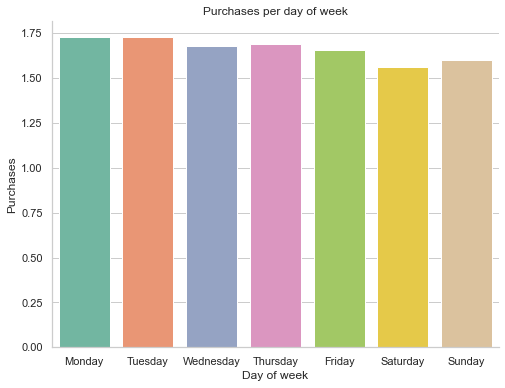

In [33]:
pdw = sns.barplot(x='day_order', y='count_purchase', data=day_orders, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2', ci= None)
pdw.set_xlabel('Day of week')
pdw.set_ylabel('Purchases')
pdw.set_title('Purchases per day of week')
sns.despine()

На графике мы видим, что наибольшее количество покупок приходится на начало недели (*понедельник и вторник*).

Дополнительно выведем по каждому товару день недели в разрезе года, в который товар чаще всего покупается. Новый датафрейм **day_year_orders**. 
<br>Визуализируем полученный результат.

In [34]:
day_year_orders = orders_full.groupby(['product_id', 'year_order', 'day_order'], as_index=False)\
    .agg({'price' : 'count'}).rename(columns={'price' : 'count_purchase'})\
    .sort_values(['product_id', 'year_order', 'count_purchase'], ascending=[True, True, False])
day_year_orders.head()

,product_id,year_order,day_order,count_purchase
0,00066f42aeeb9f3007548bb9d3f33c38,2018,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,2017,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,2017,Thursday,1
3,000b8f95fcb9e0096488278317764d19,2018,Friday,1
4,000b8f95fcb9e0096488278317764d19,2018,Wednesday,1


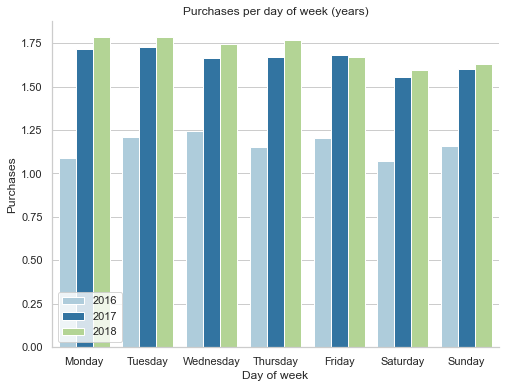

In [35]:
pdy = sns.barplot(x='day_order', y='count_purchase', data=day_year_orders, 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='year_order',
                 palette='Paired', ci= None)
sns.set_style("whitegrid")
pdy.set_xlabel('Day of week')
pdy.set_ylabel('Purchases')
pdy.set_title('Purchases per day of week (years)')
plt.legend(loc='lower left')
sns.despine()

Тенденция по наибольшему количеству покупок в начале недели (понедельник и вторник) сохраняется в 2017 и 2018 годах. 
<br>В 2016 г. - это среда.

# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

В решении этой задачи также, как и в 3м задании, за неделю покупки мы принимаем дату создания заказа order_purchase_timestamp, т.к. мы хотим отследить именно недели, в которые оформляюся заказы для дальнейших покупок.
Также в этой задаче не будем брать в расчет сам факт покупки, т.к. нам важно знать именно неделю оформления заказа.

Так как внутри месяца может быть не целое количество недель, создадим две новые колонки с месяцем и календарной неделей.
<br>Продолжим работать со вторым датафреймом **orders_customers**.

In [36]:
orders_customers['calendar_week_purchase'] = orders_customers.order_purchase_timestamp.dt.isocalendar().week
orders_customers['month_purchase'] = orders_customers.order_purchase_timestamp.dt.month
orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,plan_month,plan_year,calendar_week_purchase,month_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,10,2017,40,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8,2018,30,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,9,2018,32,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,12,2017,46,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2,2018,7,2


Создадим новый датафрейм **week_purchase**, где посчитаем среднее количество покупок в неделю в разрезе календарной недели и месяца.

In [37]:
week_purchase = orders_customers.query("order_status == 'delivered' and order_delivered_customer_date.notna()")\
    .groupby(['customer_unique_id', 'month_purchase', 'calendar_week_purchase'], as_index=False)\
    .agg({'order_id' : 'count'})\
    .groupby(['customer_unique_id', 'month_purchase', 'calendar_week_purchase'], as_index=False)\
    .agg({'order_id' : 'mean'}).rename(columns={'order_id' : 'mean_week_purchase'})\
    .sort_values(['month_purchase', 'calendar_week_purchase', 'mean_week_purchase'], ascending=True)
week_purchase = week_purchase.reset_index().drop(columns='index')
week_purchase.head()

,customer_unique_id,month_purchase,calendar_week_purchase,mean_week_purchase
0,000d460961d6dbfa3ec6c9f5805769e1,1,1,1.0
1,0028cfeb9dfcd3628a56d5b6400deef5,1,1,1.0
2,003c457932a554e4df13834237b1ed00,1,1,1.0
3,007d9f716ead2bc8712255271a38f609,1,1,1.0
4,0083e758383b3deb6c6dac1b0b431ac0,1,1,1.0


In [38]:
#пример оформления заказа в течение одной календарной недели, но в разные месяцы
week_purchase[week_purchase.customer_unique_id == '3ff874206f1d7d1e3ffe12bc9c88c27c']    

,customer_unique_id,month_purchase,calendar_week_purchase,mean_week_purchase
63028,3ff874206f1d7d1e3ffe12bc9c88c27c,7,31,1.0
64101,3ff874206f1d7d1e3ffe12bc9c88c27c,8,31,1.0


Визуализируем полученный результат.

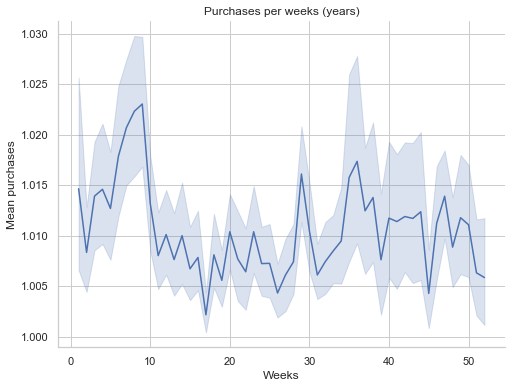

In [39]:
weeks_dynamics = sns.lineplot(x='calendar_week_purchase', y='mean_week_purchase', data=week_purchase)
sns.set_style("whitegrid")
weeks_dynamics.set_xlabel('Weeks')
weeks_dynamics.set_ylabel('Mean purchases')
weeks_dynamics.set_title('Purchases per weeks (years)')
sns.despine()

Добавим детализацию по годам.

In [40]:
orders_customers['year_order'] = orders_customers.order_purchase_timestamp.dt.year

In [41]:
week_purchase_2 = orders_customers.query("order_status == 'delivered' and order_delivered_customer_date.notna()")\
    .groupby(['customer_unique_id', 'year_order', 'month_purchase', 'calendar_week_purchase'], as_index=False)\
    .agg({'order_id' : 'count'})\
    .groupby(['customer_unique_id', 'year_order', 'month_purchase', 'calendar_week_purchase'], as_index=False)\
    .agg({'order_id' : 'mean'}).rename(columns={'order_id' : 'mean_week_purchase'})\
    .sort_values(['year_order', 'month_purchase', 'calendar_week_purchase', 'mean_week_purchase'], ascending=True)
week_purchase_2 = week_purchase_2.reset_index().drop(columns='index')
week_purchase_2.head()

,customer_unique_id,year_order,month_purchase,calendar_week_purchase,mean_week_purchase
0,830d5b7aaa3b6f1e9ad63703bec97d23,2016,9,37,1.0
1,0032c76b20340da25249092a268ce66c,2016,10,40,1.0
2,0636d30c77f0f9cfad81f1c9b58c791f,2016,10,40,1.0
3,06bdfbbe1857c3c925ec81abfb1c9666,2016,10,40,1.0
4,0829f7df6577d5a4b65439bea701405f,2016,10,40,1.0


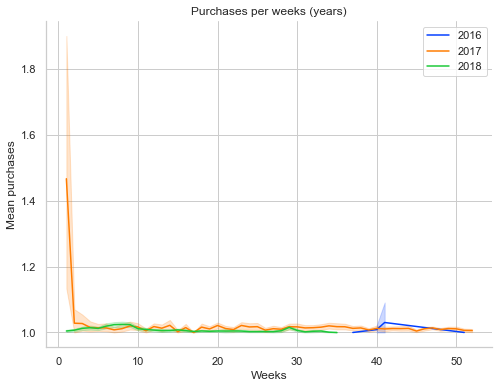

In [42]:
weeks_dynamics_2 = sns.lineplot(x='calendar_week_purchase', y='mean_week_purchase', hue='year_order', data=week_purchase_2,
                               palette='bright')
sns.set_style("whitegrid")
weeks_dynamics_2.set_xlabel('Weeks')
weeks_dynamics_2.set_ylabel('Mean purchases')
weeks_dynamics_2.set_title('Purchases per weeks (years)')
plt.legend(loc='upper right')
sns.despine()

# 5. Используя pandas, провести когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3й месяц.

Для проведения когортного анализа необходимо пользователей разделить на когорты.
<br>Группировку пользователей будет осуществлять по дате первой покупки.
<br>Как и в предыдущих заданиях мы принимаем дату создания заказа **order_purchase_timestamp**, т.к. мы хотим отследить именно дни, в которые оформляюся заказы для дальнейших покупок.
Также в этой задаче не будем брать в расчет сам факт покупки, т.к. нам важно знать именно день оформления заказа.
<br>Продолжим работать со вторым датафреймом **orders_customers**.

Определим в новой колонке **order_month** месяц и год, когда был оформлен заказ.

In [43]:
orders_customers['order_month'] = orders_customers.order_purchase_timestamp.dt.strftime('%Y-%m')

Так как имеющиеся данные есть только за полный 2017 год, то для анализа возьмем именно этот периол (2017 год с января по декабрь).

In [44]:
kohorts_customers = orders_customers.query("order_month >= '2017-01' and order_month <= '2017-12'")

Дальше определим, в какую когорту попадет клиент. 
<br>Для этого необходимо выбрать минимальное значение **order_purchase_timestamp** для каждого **customer_unique_id** и добавить в наш датафрейм.

In [45]:
kohorts_customers.set_index('customer_unique_id', inplace=True)
kohorts_customers['first_order'] = kohorts_customers.groupby(level=0)['order_month'].min()
kohorts_customers.reset_index(inplace=True)

C:\Users\Irina\AppData\Local\Temp\ipykernel_12616\4188312277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kohorts_customers['first_order'] = kohorts_customers.groupby(level=0)['order_month'].min()


Создадим новую колонку **total_orders** для дальнейшего сбора данных по количеству заказов.

In [46]:
kohorts_customers['total_orders'] = 0

C:\Users\Irina\AppData\Local\Temp\ipykernel_12616\2786193388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kohorts_customers['total_orders'] = 0


Объединим группы: верхняя группировка по **first_order**, следом по **order_month**.
<br>На этом же шаге определим количество заказов по количеству элементов в одном *first_order* и количество уникальных клиентов.

In [47]:
cohorts = kohorts_customers.groupby(['first_order', 'order_month'])\
    .agg({'customer_unique_id' : 'nunique', 'total_orders' : 'count'})\
    .rename(columns={'customer_unique_id' : 'n_customers'})
cohorts.head()

n_customers  total_orders
first_order order_month                           
2017-01     2017-01              765           800
            2017-02                3             3
            2017-03                2             2
            2017-04                1             1
            2017-05                3             3

In [48]:
# функция для расчета номера периода
def cohort_period(df):
 df['period_number'] = np.arange(len(df)) + 1 # отсчет с 1
 return df

# присвоим периоды
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

n_customers  total_orders  period_number
first_order order_month                                          
2017-01     2017-01              765           800              1
            2017-02                3             3              2
            2017-03                2             2              3
            2017-04                1             1              4
            2017-05                3             3              5

Для дальнейшей работы нужно наш датафрейм **cohorts** переделать в форму матрицы.

In [49]:
cohorts = cohorts.reset_index(drop=False)

In [50]:
df_cohort = cohorts.pivot_table(index='first_order', columns='period_number', values='n_customers')
df_cohort.head()

period_number,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,
2017-01,765.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,3.0,1.0
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,NaN
2017-04,2353.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,NaN,NaN
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,NaN,NaN,NaN


Создадим датафрейм **cohort_size** с данными о размерах когорт.

In [51]:
cohort_size = df_cohort.iloc[:,0]
cohort_size.head()

first_order
2017-01     765.0
2017-02    1752.0
2017-03    2636.0
2017-04    2353.0
2017-05    3596.0
Name: 1, dtype: float64

Считаем **Retention** и смотрим, как меняется процент возврата в каждой группе.

In [52]:
retention_matrix = df_cohort.divide(cohort_size, axis = 0)
retention_matrix.head()

period_number,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,
2017-01,1.0,0.003922,0.002614,0.001307,0.003922,0.001307,0.005229,0.001307,0.001307,0.003922,0.001307
2017-02,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142
2017-03,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,NaN
2017-04,1.0,0.005950,0.002125,0.001700,0.003400,0.002550,0.003400,0.002975,0.002975,NaN,NaN
2017-05,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,NaN,NaN,NaN


Теперь можно визуализировать полученные результаты.

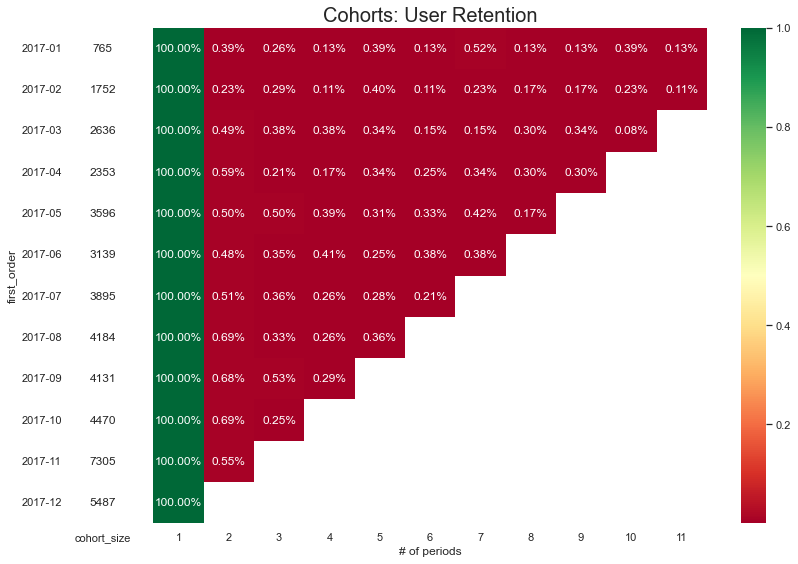

In [53]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # матрица retention
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.2%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Cohorts: User Retention', fontsize=20)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # размер когорты
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={1: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In [54]:
for_max_kohort_name = pd.DataFrame(retention_matrix.iloc[:,2]).reset_index().rename(columns={3 : 'retention'})
max_kohort_name = for_max_kohort_name.iloc[for_max_kohort_name.retention.idxmax()][0]
max_kohort_name

'2017-09'

In [55]:
max_kohort = round((retention_matrix.iloc[:,2].max()*100), 2)
max_kohort

0.53

In [56]:
print('Ответ: Когорта {} с самым высоким retention {}% на 3й месяц.'.format(max_kohort_name, max_kohort))

Ответ: Когорта 2017-09 с самым высоким retention 0.53% на 3й месяц.


# 6. Построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
Метрики: 
<br>**R** - время от последней покупки пользователя до текущей даты, 
<br>**F** - суммарное количество покупок у пользователя за всё время, 
<br>**M** - сумма покупок за всё время. 
<br>Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации этих кластеров.

Для начала необходимо определить, по каким данным будем проводить сегментацию.
- Для работы используем объединенную таблицу по 3м файлам **orders_full**.
- Факт покупки, как и в 1м задании, принимаем при статусе заказа **delivered** и не пустым значением по колонке **order_delivered_customer_date**. Метрику **R** считаем по колонке **order_delivered_customer_date**.
- Для расчета метрики **M** необходимо создать новую колонку с общей суммой по заказу **revenue**.

Создадим новую колонку с общей суммой по заказу **revenue**.

In [57]:
orders_full['revenue'] = orders_full.price * orders_full.order_item_id

Проверим, за какой период у нас предоставлены данные

In [58]:
print('Orders from {} to {}'.format(orders_full['order_delivered_customer_date'].min(),
                                    orders_full['order_delivered_customer_date'].max()))

Orders from 2016-10-11 13:46:32 to 2018-10-17 13:22:46


Т.к. номера заказов могут дублироваться в датасете из-за того, что в одном заказе может  быть несколько строк с разными товарами, а нас интересует количество покупок, а не количество заказов, необходимо создать новый датасет, в котором будут аггрегированы значения в разрезе номера заказа **order_id**.

Также известно, что RFM-сегментация обычно проводится за период = 1 год. Поэтому ограничим наш датасет данными за **2017 год**.

In [59]:
orders_for_rfm = orders_full.query("order_status == 'delivered' and order_delivered_customer_date.notna() \
                           and order_delivered_customer_date.dt.year == 2017")\
    .groupby(['order_id', 'order_delivered_customer_date', 'customer_unique_id']).agg({'revenue': 'sum'})\
    .reset_index()
orders_for_rfm.head()

,order_id,order_delivered_customer_date,customer_unique_id,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,58.9
1,00018f77f2f0320c557190d7a144bdd3,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,239.9
2,00042b26cf59d7ce69dfabb4e55b4fd9,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,199.9
3,00048cc3ae777c65dbb7d2a0634bc1ea,2017-05-22 13:44:35,85c835d128beae5b4ce8602c491bf385,21.9
4,00054e8431b9d7675808bcb819fb4a32,2017-12-18 22:03:38,635d9ac1680f03288e72ada3a1035803,19.9


Ввиду того, что задание выполняется спустя несколько лет после окончания периода предоставленных данных, установим **NOW** дату в размере 1 день после последней покупки.

In [60]:
NOW = orders_for_rfm['order_delivered_customer_date'].max() + timedelta(days=1)
NOW

Timestamp('2018-01-01 15:19:16')

Установим период в 365 дней.

In [61]:
period = 365

Добавим колонку с количеством дней между последней покупкой и NOW датой.

In [62]:
orders_for_rfm['days_since_order'] = orders_for_rfm['order_delivered_customer_date'].apply(lambda x: (NOW - x).days)

Теперь можно создать новый датафрейм с данными в разрезе пользователей.

In [63]:
aggr = {
    'days_since_order': lambda x: x.min(),  # (Recency)
    'order_delivered_customer_date': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), 
    # общее количество заказов за последний период (Frequency)
}
rfm = orders_for_rfm.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'days_since_order': 'Recency', 'order_delivered_customer_date': 'Frequency'}, inplace=True)
rfm.head()

,customer_unique_id,Recency,Frequency
0,0000f46a3911fa3c0805444483337064,271,1
1,0000f6ccb0745a6a4b88665a16c9f078,60,1
2,0004aac84e0df4da2b147fca70cf8255,34,1
3,0005e1862207bf6ccc02e4228effd9a0,298,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,150,1


Добавим **Monetary** по каждому пользователю.

In [64]:
rfm['Monetary'] = rfm['customer_unique_id'].apply(lambda x: orders_for_rfm[(orders_for_rfm['customer_unique_id'] == x) & \
                                                (orders_for_rfm['order_delivered_customer_date'] >= NOW - timedelta(days=period))]\
                                                ['revenue'].sum())
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000f46a3911fa3c0805444483337064,271,1,69.00
1,0000f6ccb0745a6a4b88665a16c9f078,60,1,25.99
2,0004aac84e0df4da2b147fca70cf8255,34,1,180.00
3,0005e1862207bf6ccc02e4228effd9a0,298,1,135.00
4,0006fdc98a402fceb4eb0ee528f6a8d4,150,1,13.90


На этом этапе мы имеем показатели по всем трем направлениям сегментации.
<br>Далее каждый пользователь получит оценки между 1 и 5 по каждому параметру.

Для определения критериев попадания в сегмент будем использовать квантили, каждый из которых содержит 20% общего числа по группе.

In [65]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 34.0, 0.4: 90.0, 0.6: 151.39999999999782, 0.8: 223.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.99, 0.8: 195.64200000000005}}

Далее напишем функцию для определения ранга по каждому параметру (от 1 до 5).
<br>*Причем меньший показатель Recency лучше большего показателя. В то время как большие показатели Frequency и Monetary являются лучшими показателями.*

In [66]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

In [67]:
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

Теперь можно присвоить ранги **R, F и M** пользователям.

In [68]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

И наконец соединяем R, F и M оценки в одну **RFM**.

In [69]:
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000f46a3911fa3c0805444483337064,271,1,69.00,1,1,2,112
1,0000f6ccb0745a6a4b88665a16c9f078,60,1,25.99,4,1,1,411
2,0004aac84e0df4da2b147fca70cf8255,34,1,180.00,5,1,4,514
3,0005e1862207bf6ccc02e4228effd9a0,298,1,135.00,1,1,4,114
4,0006fdc98a402fceb4eb0ee528f6a8d4,150,1,13.90,3,1,1,311


Дополнительно можем визуализировать полученные сегменты.

**График распределения пользователей по R и F**

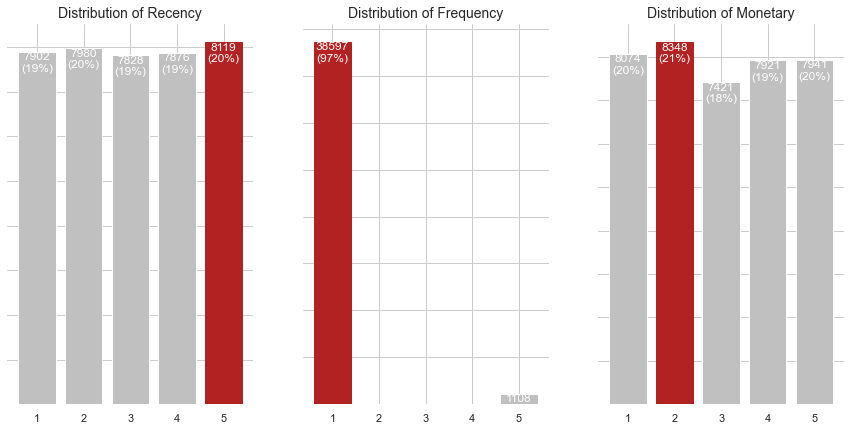

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

for i, p in enumerate(['R', 'F', 'M']):
    parameters = {'R':'Recency', 'F':'Frequency', 'M':'Monetary'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

На графиках мы видим, что примерно равное количество пользователей (около 20%) распределено по каждой группе по показателю Recency, т.е. в 1м периоде покупает товары одна группа, во 2м - другая, и т.д. И их количество примерно одинаковое на протяжении года.
<br>Аналогичная ситуация и с показателем Monetary. 
<br>Что касается частоты покупок, так можно отметить, что 97% пользователей покупаю с частотой в 1 покупку в год.

Посмотрим, сколько сегментов у нас получилось в итоге.

In [71]:
# сгруппируем студентов по сегментам для вывода:
grouped_RFM = rfm.groupby('RFM_Score', as_index=False) \
                 .agg({'customer_unique_id': 'count'}) \
                 .rename(columns={'customer_unique_id': 'number_of_students'}) \
                 .sort_values('number_of_students', ascending=False)

In [72]:
print(f'Число ненулевых сегментов: {grouped_RFM.shape[0]}')

Число ненулевых сегментов: 50


В текущей сегментации RFM оценки дают нам 125 сегментов (5^3). Но это слишком большой объем для анализа.
<br>Поэтому в нашем случае решено поработать с 10 сегментами, основанными на R и F оценках.
<br>Описание сегментов:

Сегмент - Описание
- **Champions** - Покупали недавно, покупали часто и тратили больше всего.
- **Loyal Customers** - Покупают на регулярной основе с суммой покупок выше среднего. Реагируют на акции.
- **Potential Loyalist** - Недавние клиенты со средней частотой (frequency) и суммой покупок выше среднего.
- **Recent Customers** - Покупали совсем недавно, но не часто.
- **Promising** - Недавние клиенты со средней частотой покупок, но тратят немного.
- **Customers Needing Attention** - Покупали давновато, редко, но с большой суммой покупок.
- **About To Sleep** - Покупали давновато со средними значениями frequency и monetary. Можем потерять их, если не возобновим с ними работу.
- **Can’t Lose Them** - Привыкли покупать часто с небольшой суммой покупок, но не возвращались в течение длительного времени.
- **At Risk** - Покупали часто с большой суммой покупок, но очень давно. Необходимо их вернуть!
- **Hibernating** - Последняя покупка была давно, небольшое количество заказов с небольшой суммой покупок. Может быть потерян.

In [73]:
# присвоим значения сегментов 
segt_map = {
    r'[3-5][1-2][1-3]': 'hibernating',
    r'[3-5][4-5][4-5]': 'at risk',
    r'[3-5][3-5][1-3]': 'can\'t lose',
    r'[2-3][3-4][3-4]': 'about to sleep',
    r'[3-5][1-2][4-5]': 'need attention',
    r'[1-3][3-5][1-3]': 'promising',
    r'[1-2][1-2][1-5]': 'new customers',
    r'[1-2]3[3-5]': 'potential loyalists',
    r'[1-2][4-5][3-5]': 'loyal customers',
    r'155': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + + rfm['M'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,0000f46a3911fa3c0805444483337064,271,1,69.00,1,1,2,112,new customers
1,0000f6ccb0745a6a4b88665a16c9f078,60,1,25.99,4,1,1,411,hibernating
2,0004aac84e0df4da2b147fca70cf8255,34,1,180.00,5,1,4,514,need attention
3,0005e1862207bf6ccc02e4228effd9a0,298,1,135.00,1,1,4,114,new customers
4,0006fdc98a402fceb4eb0ee528f6a8d4,150,1,13.90,3,1,1,311,hibernating


Давайте посмотрим на распределение наших пользователей по сегментам.

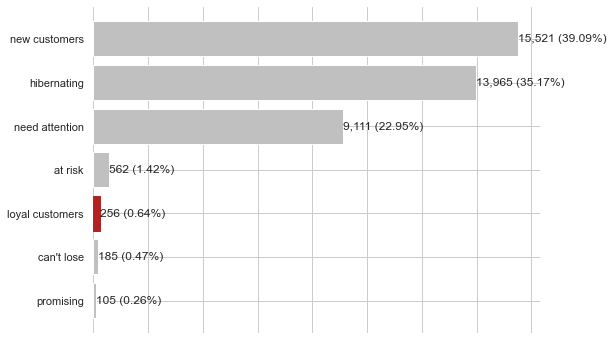

In [74]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   round(float(value*100/segments_counts.sum()),2)),
                va='center',
                ha='left'
               )

plt.show()

Если не учитывать долю новых клиентов, то на графике видно, что наибольшая доля пользователей (**35%**) - это те пользователи, которых мы можем потерять (**Hibernating**).
<br>При этом доля постоянных пользователей (**Champions, Loyal Customers**) очень мала - меньше 1%.
<br>Также можем видеть долю клиетов в зоне риска и нуждающихся в дополнительном внимании (**need attention, at risk**) - около 25%.